In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creat a se of random latitude and longitudes combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
#import citpy 
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [7]:
import requests
requests.__version__

'2.25.1'

Map out project using Pseudocode

In [8]:
#import dependencies and intitalize coutner and an empty list to hold weather data 
#Loop through the Cities list 
#group the cities in sets of 50 to lof the process as we find the weather data for each city 
    #Two counter will be needed: one to log the cit count from 1-50 and second for the set
#Build the city_url for each city 
#log the url and the record and st numbers
#make the api request for each city
#parse the JSON weather date for the following 
    #City,country and date
    #lat/long
    #max temp
    #humidity
    #cloudiness
    #wind speed
#Add the data to a list in a dictionary format and convert to df

In [9]:
# ipor dependencies and URL
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | fare
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | manitouwadge
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | sinkat
City not found. Skipping...
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | coahuayana
Processing Record 20 of Set 1 | vardo
Processi

Processing Record 38 of Set 4 | cabo san lucas
Processing Record 39 of Set 4 | kolno
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | rawson
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 45 of Set 4 | shizunai
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | khovu-aksy
Processing Record 48 of Set 4 | jiddah
City not found. Skipping...
Processing Record 49 of Set 4 | kapaa
Processing Record 50 of Set 4 | barguzin
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | bowen
Processing Record 3 of Set 5 | rwamagana
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | ishigaki
Processing Record 7 of Set 5 | camacha
Processing Record 8 of Set 5 | manyana
Processing Record 9 of Set 5 | 

Processing Record 26 of Set 8 | mandalgovi
Processing Record 27 of Set 8 | pevek
Processing Record 28 of Set 8 | kanigoro
Processing Record 29 of Set 8 | ambulu
Processing Record 30 of Set 8 | chake chake
Processing Record 31 of Set 8 | berbera
Processing Record 32 of Set 8 | marystown
Processing Record 33 of Set 8 | quatre cocos
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | radford
Processing Record 36 of Set 8 | alvorada
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | maarianhamina
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | villazon
Processing Record 42 of Set 8 | aswan
Processing Record 43 of Set 8 | oranjestad
Processing Record 44 of Set 8 | ketchikan
Processing Record 45 of Set 8 | altagracia de orituco
Processing Record 46 of Set 8 | cordoba
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | denizli
Processing Record 49 of Set 8 | sumbe

Processing Record 19 of Set 12 | albury
Processing Record 20 of Set 12 | mirnyy
Processing Record 21 of Set 12 | wolmaranstad
City not found. Skipping...
Processing Record 22 of Set 12 | batagay-alyta
Processing Record 23 of Set 12 | vilyuysk
Processing Record 24 of Set 12 | soe
Processing Record 25 of Set 12 | blind river
Processing Record 26 of Set 12 | biak
Processing Record 27 of Set 12 | sechura
Processing Record 28 of Set 12 | ventspils
Processing Record 29 of Set 12 | sept-iles
Processing Record 30 of Set 12 | darhan
Processing Record 31 of Set 12 | shimanovsk
Processing Record 32 of Set 12 | kondinskoye
Processing Record 33 of Set 12 | royan
Processing Record 34 of Set 12 | kadhan
Processing Record 35 of Set 12 | wangaratta
Processing Record 36 of Set 12 | klaksvik
Processing Record 37 of Set 12 | cam ranh
Processing Record 38 of Set 12 | martapura
Processing Record 39 of Set 12 | san juan
Processing Record 40 of Set 12 | bolungarvik
City not found. Skipping...
Processing Recor

In [11]:
len(city_data)

593

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.80,54,40,8.05,AR,2021-03-26 20:05:43
1,Fare,-16.7000,-151.0167,83.05,73,6,23.09,PF,2021-03-26 20:05:43
2,East London,-33.0153,27.9116,69.87,83,59,14.79,ZA,2021-03-26 20:05:44
3,Bluff,-46.6000,168.3333,57.99,81,100,1.01,NZ,2021-03-26 20:05:44
4,Pacific Grove,36.6177,-121.9166,64.40,39,1,6.91,US,2021-03-26 20:05:44
5,Bengkulu,-3.8004,102.2655,76.68,89,96,3.96,ID,2021-03-26 20:05:44
6,Manitouwadge,49.1215,-85.8403,30.20,68,75,13.80,CA,2021-03-26 20:05:45
7,Tuktoyaktuk,69.4541,-133.0374,-7.60,77,90,12.66,CA,2021-03-26 20:05:45
8,Guerrero Negro,27.9769,-114.0611,63.70,51,0,16.13,MX,2021-03-26 20:05:45
9,Punta Arenas,-53.1500,-70.9167,53.60,58,75,12.66,CL,2021-03-26 20:05:46


In [15]:
# re-orderthe data fram columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-03-26 20:05:43,-54.8000,-68.3000,51.80,54,40,8.05
1,Fare,PF,2021-03-26 20:05:43,-16.7000,-151.0167,83.05,73,6,23.09
2,East London,ZA,2021-03-26 20:05:44,-33.0153,27.9116,69.87,83,59,14.79
3,Bluff,NZ,2021-03-26 20:05:44,-46.6000,168.3333,57.99,81,100,1.01
4,Pacific Grove,US,2021-03-26 20:05:44,36.6177,-121.9166,64.40,39,1,6.91
5,Bengkulu,ID,2021-03-26 20:05:44,-3.8004,102.2655,76.68,89,96,3.96
6,Manitouwadge,CA,2021-03-26 20:05:45,49.1215,-85.8403,30.20,68,75,13.80
7,Tuktoyaktuk,CA,2021-03-26 20:05:45,69.4541,-133.0374,-7.60,77,90,12.66
8,Guerrero Negro,MX,2021-03-26 20:05:45,27.9769,-114.0611,63.70,51,0,16.13
9,Punta Arenas,CL,2021-03-26 20:05:46,-53.1500,-70.9167,53.60,58,75,12.66


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PLot Latitude vs Temperature

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

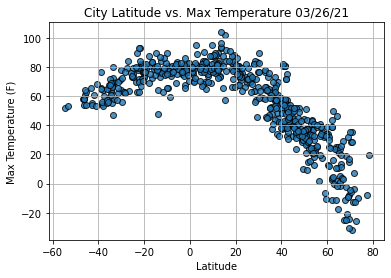

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

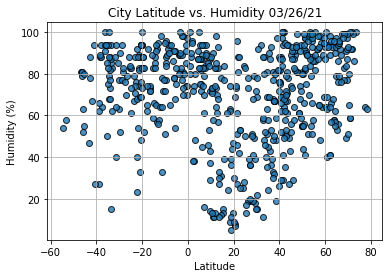

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

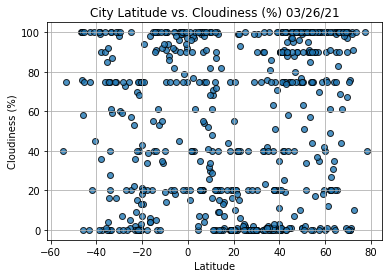

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

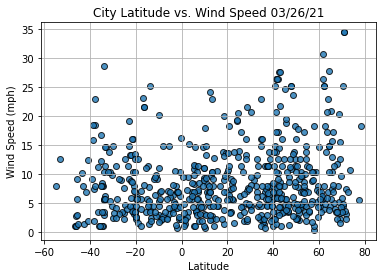

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()